<a href="https://colab.research.google.com/github/OmarMedhat22/Hand-Gesture-Recognition/blob/master/Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from io import StringIO 

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [ ]:
uploaded=files.upload()

In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        x=0
        images = []
        labels=[]
        for i in training_file:#range(1,training_file)):
            if x > 0:
                #print(i[0])
                y = i.split(",")
                #labels.append(y[0])
                #images.append(y[1:785])
                s = StringIO(i)
                z = np.loadtxt(s, delimiter=',')
                labels.append(z[0])
                images.append(z[1:785])


            x+=1
            
        #print(len(images))
        #print(len(labels))
        #print(x)
        images = np.array(images).astype(float)
        labels = np.array(labels).astype(float)
        #print(images[0])
        #print(images[0][0])
        #print(images[0][1])
        #print(images[0][2])

        images = images.reshape(-1,28,28)
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=-1) # Your Code Here
testing_images = np.expand_dims(testing_images, axis=-1)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale = 1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.Dense(25, activation='softmax')  ]
    )

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model

#history = model.fit_generator(train_generator, epochs=2, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)
history=model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=16),
         validation_data=(testing_images, testing_labels),
         steps_per_epoch=len(training_images) // 16,
         validation_steps = 7172 // 16,                   
         epochs=10)
model.evaluate(validation_datagen.flow(testing_images, testing_labels), verbose=0)
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/10
1715/1715 [==============================] - 150s 87ms/step - loss: 2.7833 - accuracy: 0.1580 - val_loss: 253.1886 - val_accuracy: 0.2520
Epoch 2/10
1715/1715 [==============================] - 139s 81ms/step - loss: 2.0376 - accuracy: 0.3588
Epoch 3/10
1715/1715 [==============================] - 138s 80ms/step - loss: 1.6805 - accuracy: 0.4626
Epoch 4/10
1715/1715 [==============================] - 138s 81ms/step - loss: 1.4764 - accuracy: 0.5265
Epoch 5/10
1715/1715 [==============================] - 137s 80ms/step - loss: 1.3199 - accuracy: 0.5768
Epoch 6/10
1715/1715 [==============================] - 137s 80ms/step - loss: 1.2212 - accuracy: 0.6071
Epoch 7/10
1715/1715 [==============================] - 137s 80ms/step - loss: 1.1467 - accuracy: 0.6301
Epoch 8/10
1715/1715 [==============================] - 137s 80ms/step - loss: 1.0738 - accuracy: 0.6512
Epoch 9/10
1715/1715 [==============================] - 137s 80ms/step - loss: 1.0085 - accuracy: 0.6716
Epoch 10/10

[6.92426086682151, 0.56609035]

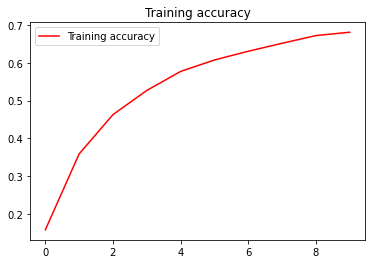

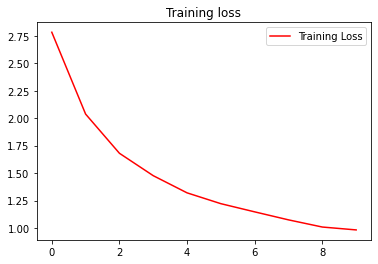

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt

acc=history.history['accuracy']
loss=history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()